# **Day - 8 | Digit Recognition using RANDOM FOREST**

# *Importing Basic Library*

In [1]:
import pandas as pd
import numpy as np

### *Access Google Drive contents*

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
!pwd

/content/gdrive/My Drive/Pantech


In [26]:
import os
os.chdir('/content/gdrive/My Drive/Pantech/Day8')

In [21]:
!dir

403199\ (1).pdf
Colab\ Notebooks
DATA\ SCIENCE\ WITH\ PYTHON\ CLASS\ ROOM\ NOTES.pdf
DATA\ SCIENCE\ WITH\ PYTHON\ CLASS\ ROOM\ NOTES\ QULAITY\ THOUGHT.pdf
EnergyMeter.gsheet
Krish-Naik
Minimalist\ Monthly\ Planner\ 5\ Rows\ -\ Monday.pdf
ML
Pantech
Pers
Praveen\ POA\ -\ Tracker\ .xlsx
Python
TradeHistory.gsheet
Untitled\ document\ (1).gdoc
Untitled\ document\ (2).gdoc
Untitled\ document\ (3).gdoc
Untitled\ document\ (4).gdoc
Untitled\ document.gdoc
Untitled\ presentation.gslides
Untitled\ spreadsheet\ (1).gsheet
Untitled\ spreadsheet.gsheet


### *Load Dataset*

In [27]:
fileName = "/content/gdrive/My Drive/Pantech/Day8/digit.csv"
dataset = pd.read_csv(fileName)

### *Summarize Dataset*

In [28]:
print(dataset.shape)
print(dataset.head(5))

(42000, 785)
   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]


### *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

In [29]:
X = dataset.iloc[:,1:]
print(X)
print(X.shape)

       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
41995       0       0       0       0  ...         0         0         0         0
41996       0       0       0       0  ...         0         0         0         0
41997       0       0       0       0  ...         0         0         0         0
41998       0       0       0       0  ...         0         0         0         0
41999       0       0       0       0  ...         0         0         0         0

[42

In [30]:
Y = dataset.iloc[:,0]
print(Y)
print(Y.shape)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64
(42000,)


### *Splitting Dataset into Test & Train*

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### *Training*

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_pred = model.predict(X_test)

In [40]:
y_test.head(5)

16275    3
19204    6
18518    9
25780    5
16228    6
Name: label, dtype: int64

In [41]:
y_pred[0]

3

### *Model Accuracy*

In [42]:
from sklearn.metrics import accuracy_score
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the Model: 96.26666666666667%


Predicted 7


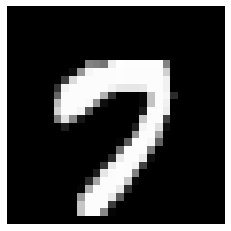

In [43]:
import matplotlib.pyplot as plt
index=10
print("Predicted " + str(model.predict(X_test)[index]))
plt.axis('off')
plt.imshow(X_test.iloc[index].values.reshape((28,28)),cmap='gray')